# Plots for Figures in the Paper for N = 100

Here, I make plots for the paper using $N = 100$. The goal is clarity since the features are more distinct than with $N = 100$. Furthermore, based on updated measurements from the Prabhu group (see `paper_figs_asymN.ipynb`), this value of $N$ more accurately represents the polymers used in the relevant experiments than $N = 1000$. The data were obtained using Dr. Pengfei Zhang's liquid state theory code (Fortran).

In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import glob
import pandas as pd

# plotting
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt

import salt
import pe
import plot

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from bokeh.io import output_notebook
from bokeh.plotting import show

from importlib import reload
reload(salt)
reload(pe)

output_notebook()


# USER PARAMETERS
save_folder = '../PAPERS/ccls/figs/n_100/'
Z = 1 # charge per monomer (same for polyanion and polycation)
# range of temperatures considered (liquid water) [K]
T_range = [273.15, 373.15]
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [1.57, 1.78, 1.82]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [0.135]
# accurate choice for sigma based on Bjerrum length of water (see fit_sigma_to_prabhu_data_asymN.ipynb)
sigma = 4.1E-10 # [m]
# conversion of meters to Angstroms [A]
m_2_A = 1E10
# conversion from beads/sigma^3 to mol/L (M)
beads_2_M = pe.get_beads_2_M(sigma, SI=True)
# conversion from volume fraction to mol/L (M)
phi_2_M = 6/np.pi**beads_2_M

# list of colors for isotherms of binodal at different Bjerrum lengths
lB_color_list = ['#3B99FE', '#FFBF2E', '#E04D43'] # blue, yellow, red


# declares naming structure of files
naming_structure = 'NA(100)NB(100)lB(*)f(1.000)'
mu_naming_structure = 'NA(100)NB(100)lB(*)f(1.000)'
ext = 'output.dat'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

### Derived Parameters

In [8]:
# helpful function
def round_up_to_nth(m, nth):
    """Rounds m to nearest nth (fraction)"""
    return int(m*nth+1)/nth

In [9]:
# max and min Bjerrum length
T_min = 273 # [K] freezing point of h2o
T_max = 373 # [K] boiling point of h2o
lB_min = pe.lB_fn(T_min, sigma=sigma)
lB_max = round_up_to_nth(pe.lB_fn(T_max, sigma=sigma), 500) # ensures lB_max > lB_hi

print('Minimum Bjerrum length = {0:.3f} and maximum = {1:.3f}'.format(lB_min, lB_max))

# list of Bjerrum lengths to plot--correspond to [0 C, 50 C, 100 C], rounded to nearest 0.002 (spacing of data)
# computes BJerrum lengths
lB_lo = round_up_to_nth(lB_min, 500)
lB_mid = round_up_to_nth(pe.lB_fn(323, sigma=sigma), 500)
lB_hi = lB_max # don't round up or else lB_hi > lB_max and will lack data
# collects in list
lB_list = [lB_lo, lB_mid, lB_hi] # [0, 50, 100] degrees C

Minimum Bjerrum length = 1.702 and maximum = 2.286


## Figure 1 (and ToC Figure): LCST at Fixed Salt Reservoir Concentration

In [10]:
reload(salt)
### DATA PARAMETERS ###
# folder with binodal data
data_folder = 'salt/n_100_chris/' # must contain mu in .PD file
# concentration of salt in reservoir [mol/L]
rho_salt_M = 1.85
# converts to beads/sigma^3
rho_salt = rho_salt_M/beads_2_M
# folder with chemical potential calculations for salt solution
mu_salt_folder = 'salt/mu_salt_100_chris/'
### FORMATTING PARAMETERS ###
# number of points to have in plot
n_pts = 100000
# parameter to plot for z axis
z_name = 'T [C]'
# binodal at fixed temperature
z_rough = 30
# fixed composition [M]
rho_s = 1.6
rho_p = 1.6
# index for critical point
i_cp = -2 # last line has some junk?
# fixed coordinates defining outlines of binodal surface
T_for_outline = [0, 100] # C
rho_s_for_outline = [] # leave blank--vertical outlines look bad
# suppresses output of data processing
quiet = True

In [11]:
# loads data
data = salt.load_data(data_folder, ext=ext,
                lB_lo=lB_lo, lB_hi=lB_hi, naming_structure=naming_structure)

In [6]:
# computes data
data_3d, data_mu, data_z, \
data_cp, data_comp, data_outlines = salt.data_fig1(data, mu_salt_folder, rho_salt, T_range, 
                                                    sigma, z_name, beads_2_M, n_pts, z_rough, 
                                                   lB_lo=lB_lo, lB_hi=lB_hi, rho_s=rho_s, rho_p=rho_p,
                                                     ext=ext, naming_structure=naming_structure,
                                                   mu_naming_structure=mu_naming_structure, i_cp=i_cp, 
                                                   quiet=quiet, T_for_outline=T_for_outline,
                                                      rho_s_for_outline=rho_s_for_outline)

C:\Users\andyl\anaconda3\envs\py36\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:109: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:111: RuntimeWarning:

invalid value encountered in add



In [37]:
################### PLOT PARAMETERS ###################################

# parameters
fs = 14 # tick label font size
op = 0.004
ms_bin = 25
lw_bin = 30
lw_fix = 45
lw_crit = 30
lw_outline = 6

# colors
c1_T = 'blue'
c2_T = 'red'
c1_fix = 'blue'
c2_fix = 'red'
c_crit = 'black'
c_outline = '#1A2D4A'
mode = 'markers'
# figure size
width = 6000 # pixels
height = 5000 # pixels
# offset of axes from true 0 (so they are not hidden by planes in background)
offset = 0.003
# scales size of outlines to be outside the scatter plot
outline_scale_factor = 1.01
# indicates which indices of Bjerrum lengths to skip
skip = []
# show labels
show_labels = False

# coordinates of camera eye
eye_xyz = (1.5, 1.5, 1.5)

# Sets vertical axis limits
x_range = [-0.1, 6.5]
y_range = [0, 2.2]
z_range = [-1, 102]

plot_params = (x_range, y_range, z_range, eye_xyz, op, ms_bin, lw_bin, 
    lw_fix, lw_crit, lw_outline, c1_T, c2_T, c1_fix, c2_fix, 
    c_crit, c_outline, mode, width, height, fs, offset)

In [38]:
############### TOC FIGURE ########################
# type of figure
toc_fig = True # if True, just plots LCST binodal, no matter the other settings
fixed_comp = False # if True, plots fixed composition binodal
# save name
save_name = 'toc.svg'

# Makes plot
fig_toc = plot.fig1(data_3d, data_cp, data_z, data_mu, plot_params, 
                fixed_comp=fixed_comp, data_comp=data_comp, toc_fig=toc_fig,
                data_outlines=data_outlines, outline_scale_factor=outline_scale_factor,
                skip=skip, show_labels=show_labels)

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

In [39]:
############### FIGURE 1 ########################
# type of figure
toc_fig = False # if True, just plots LCST binodal, no matter the other settings
fixed_comp = True # if True, plots fixed composition binodal
# save name
save_name = 'fig1.svg'

# Makes plot
fig1 = plot.fig1(data_3d, data_cp, data_z, data_mu, plot_params, 
                fixed_comp=fixed_comp, data_comp=data_comp, toc_fig=toc_fig,
                data_outlines=data_outlines, outline_scale_factor=outline_scale_factor,
                skip=skip, show_labels=show_labels)

# saves figure
pio.write_image(fig, save_folder + save_name, width=width, height=height)

## Figure 2A

### Different Projections of Binodal Under Fixed Concentration of Salt in Saltwater Reservoir

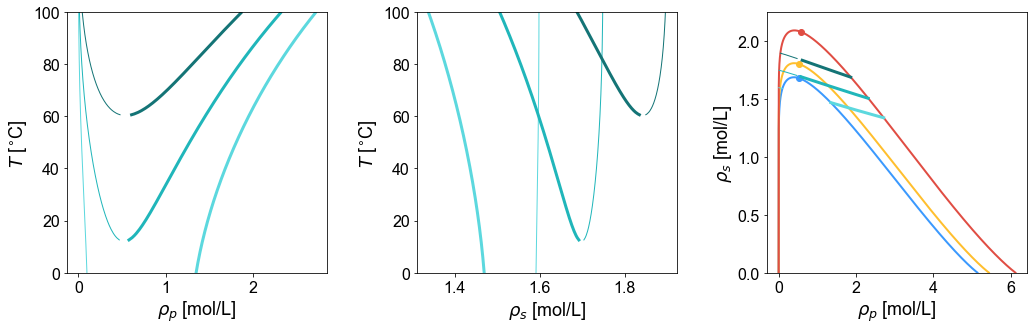

In [8]:
# PLOT PARAMETERS
# size of figure
figsize = (15, 7.5) # for wide presentation (1 x 3) # (7.5, 15) # for tall presentation (3 x 1)
pad = 3
# vertically stack subplots?
vertical = False
# show legend?
show_lgnd = False
# List of concentrations of salt in the saltwater reservoir [M]
rho_salt_M_list_list = [[1.6, 1.75, 1.9]]
# range of temperatures to plot
T_range = [273, 373]
# plot temperature in Celsius? (or Kelvin?)
T_cels = True
# parameter to plot for z axis
z_name = 'T [K]'
# list of colors
color_list = ['#5CD8DE', '#20B6BA', '#147476'] # neon blue, teal, dark teal
x_lim = None
marker = ''
fill_left = 'none'
fill_right = 'full'
lw1 = 1
lw2 = 4
# arranges keyword arguments for plot.binodal_proj_fixed_conc()
kwargs = dict(T_cels=T_cels, marker=marker,
                     naming_structure=naming_structure,
                     ext=ext, figsize=figsize, vertical=vertical)


### Plots Figure
fig2a = plot.fig2a(rho_salt_M_list_list, data, mu_salt_folder,
                color_list, T_range, sigma, z_name,
                beads_2_M, lB_list, lB_color_list, pad,
                kwargs)

# saves figure
plt.savefig(save_folder + 'fig2a.svg', bbox_inches='tight')

## Figure 2B

### Different Projections of Binodal Under Fixed Polymer and Salt Concentrations

lB = 1.702 gives 1 phase for rho_p = 0.524 [mol/L],rho_s = 1.717 [mol/L].
lB = 1.702 gives 1 phase for rho_p = 0.524 [mol/L],rho_s = 2.001 [mol/L].
lB = 1.864 gives 1 phase for rho_p = 0.524 [mol/L],rho_s = 2.001 [mol/L].


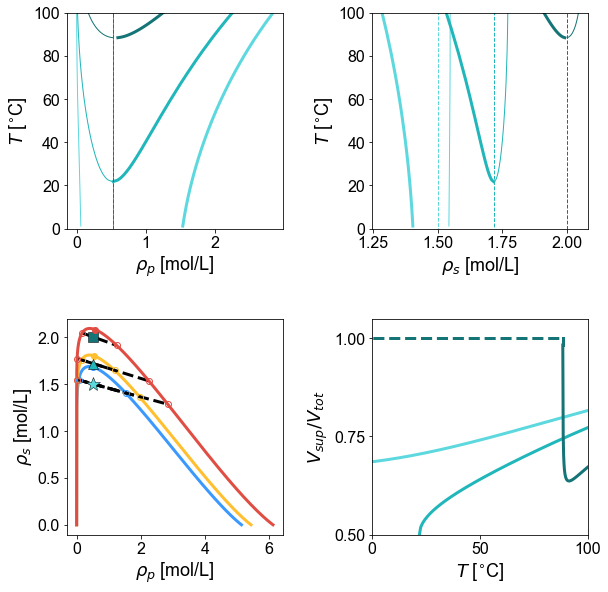

In [8]:
### PLOT PARAMETERS ###
# Temperature in Celsius on plots?
T_cels = True
# square bounding box of plot
square_box = True
# figure size
figsize = (9, 9)
lw=3 # line width for binodals
# list of colors
color_list =  ['#5CD8DE', '#20B6BA', '#147476'] # dark teal, teal, neon blue

# critical concentration at 20ish C
T_c = 20
# rho_pc_list, rho_sc_list, T_c_list = data_cp
# i_c = np.argmin( (T_c_list - T_c)**2 )
# averages the last two data points at T ~ 20 C to estimate critical point
rho_pc = (0.0106911874408693007010295872305505326949059963226318359375 + \
             0.01106965701369009950905120120978608611039817333221435546875)*beads_2_M
rho_sc = (0.07132115225665559832268769469010294415056705474853515625 + \
             0.07123972561416179460902498021823703311383724212646484375) / 2 * beads_2_M
# collects concentrations of polyelectrolyte and salt in lists
rho_p_list = [rho_pc, rho_pc, rho_pc] # all critical polyelectrolyte concentration
rho_s_list = [1.5, rho_sc, 2.001212] # second value is critical salt concentration

# collects keyword arguments
kwargs = dict(lw=lw, sigma=sigma, T_cels=T_cels, square_box=square_box)


### Plots Data
fig2b = plot.fig2b(data, rho_p_list, rho_s_list, beads_2_M, lB_list, color_list, lB_color_list, kwargs, figsize=figsize)

# saves plot
plt.savefig(save_folder + 'fig2b_fixed_salt.svg', bbox_inches='tight')

Unfortunately, the change in critical salt concentration with temperature is almost imperceptible, such that the gap in the coexistence at the highest salt concentration could easily be mistaken for a numerical limitation. As such, I will have to accept that the clearer figure is one in which both salt *and polyelectrolyte* concentrations are varied. 

Such a figure is produced below.

## Figure 2 (alternative again): Different Salt and Polymer Compositions

lB = 1.702 gives 1 phase for rho_p = 0.524 [mol/L],rho_s = 1.717 [mol/L].
lB = 1.702 gives 1 phase for rho_p = 0.300 [mol/L],rho_s = 1.900 [mol/L].
lB = 1.864 gives 1 phase for rho_p = 0.300 [mol/L],rho_s = 1.900 [mol/L].


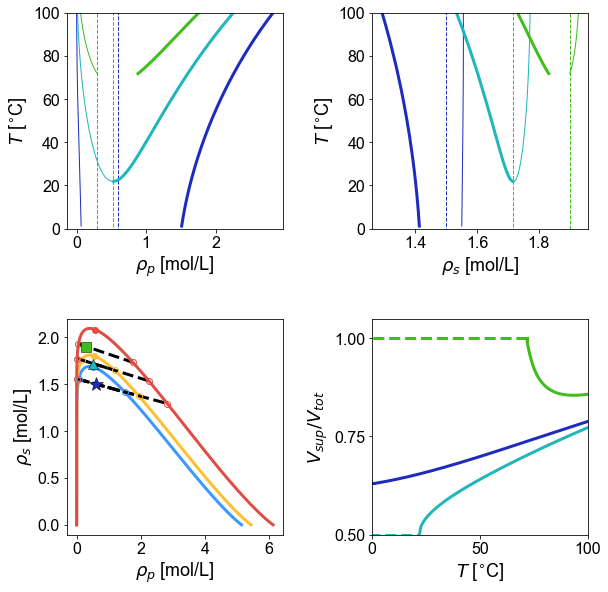

In [10]:
# Parameters
figsize = (9, 9)
# Temperature in Celsius on plots?
T_cels = True
# square bounding box of plot
square_box = True
lw=3 # line width for binodals
# list of colors
color_list =  ['#1D2CBD', '#20B6BA', '#3FBD1D'] # blue, teal, green 
# old colors: ['#5CD8DE', '#20B6BA', '#147476'] # neon blue, teal, dark teal
lB_color_list = ['#3B99FE', '#FFBF2E', '#E04D43'] # blue, yellow, red

# averages the last two data points at T ~ 20 C to estimate critical point
rho_pc = (0.0106911874408693007010295872305505326949059963226318359375 + \
             0.01106965701369009950905120120978608611039817333221435546875)*beads_2_M
rho_sc = (0.07132115225665559832268769469010294415056705474853515625 + \
             0.07123972561416179460902498021823703311383724212646484375) / 2 * beads_2_M

# compositions to plot
rho_p_list = [0.6, rho_pc, 0.3]
rho_s_list = [1.5, rho_sc, 1.9] # second value is critical salt concentration

# collects keyword arguments
kwargs = dict(lw=lw, sigma=sigma, T_cels=T_cels, square_box=square_box)


### Plots Figure
fig2b = plot.fig2b(data, rho_p_list, rho_s_list, beads_2_M, lB_list, color_list, lB_color_list, kwargs, figsize=figsize)

# saves plot
plt.savefig(save_folder + 'fig2b_varied.svg', bbox_inches='tight')

## Figure 3: Binodal in Salt-Polymer Plane for Fixed Salt and Polymer Concentrations

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:109: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:111: RuntimeWarning:

invalid value encountered in add



lB = 1.702 gives 1 phase for rho_p = 0.300 [mol/L],rho_s = 2.000 [mol/L].
lB = 1.864 gives 1 phase for rho_p = 0.300 [mol/L],rho_s = 2.000 [mol/L].
lB = 1.702 gives 1 phase for rho_p = 2.000 [mol/L],rho_s = 1.350 [mol/L].
lB = 1.864 gives 1 phase for rho_p = 2.000 [mol/L],rho_s = 1.350 [mol/L].


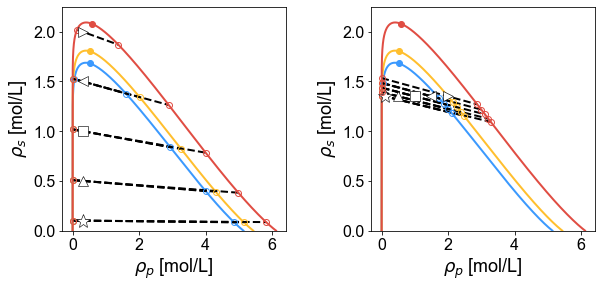

In [14]:
# Parameters
figsize = (9, 6) # (1 x 2) wide frame size # (6, 9) # (2 x 1) tall frame size
# vertically stack subplots?
vertical = False
# Temperature in Celsius?
T_cels = True
# square plot box?
square_box = True
# marker edge width
mew = 0.6

# colors of fixed Bjerrum length sections of binodal
colors = lB_color_list

# fixed polymer concentration [mol/L]
rho_p_fixed = 0.3
# list of salt (cation) concentrations [mol/L]
rho_s_varied = [0.1, 0.5, 1.0, 1.5, 2.0]
# fixed salt concentration [mol/L]
rho_s_fixed = 1.35
# list of polymer (polyanion + polycation) concentrations [mol/L]
rho_p_varied = [0.1, 0.5, 1.0, 1.5, 2.0]

# limits of salt (y) axis [mol/L]
y_lim = [0, 2.25]

# collects keyword arguments
kwargs = dict(colors=colors, sigma=sigma, T_cels=T_cels, 
              square_box=square_box, mew=mew, y_lim=y_lim)


### Plots figure
fig3 = plot.fig3(data, lB_list, rho_p_fixed, rho_s_fixed, rho_p_varied, rho_s_varied,
            beads_2_M, kwargs, figsize=figsize, vertical=vertical)

# saves figure
plt.savefig(save_folder + 'fig3.svg', bbox_inches='tight')

## Figure 4: Comparing Effect of Salt on Binodal between Theory and Experiment

We just show the plots produced by theory. The results from experiments are given in Ali et al. (2019) *Macromol.*

In [12]:
# loads data
data_folder = 'salt/asymN400/'
ext = 'output.dat'
NA = 100
NB = 400
f = 1
naming_structure = 'NA({0:d})NB({1:d})*f({2:.3f})'.format(NA, NB, f)
data = salt.load_data(data_folder, naming_structure=naming_structure, ext=ext)

### New Approach: Plot with Matplotlib and Overlay Experimental Data

Now that I have recorded the experimental data in a data file, I can load the data and plot the points directly on top of the liquid state theory's predictions

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:201: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:202: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\andyl\OneDrive - California Institute of Technology\Documents\Research\Wang\complex_coacervate\salt.py:204: SettingWithCopyWarning:


A value is trying to be set on a copy of a 

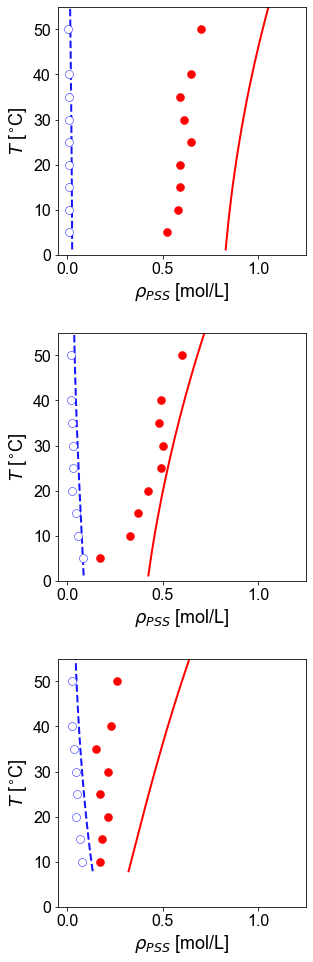

In [14]:
# Parameters
figsize = (8, 14) # (14, 8) # 1 x 3 wide frame size
# path to experimental data
exp_data_filepath = '../References/CCLS/Data/prabhu_experimental_data_raw.csv'
# list of salt concentrations [mol/L] used in the experiments
rho_s_list = [1.75, 2.0, 2.05]
# polymer concentration used in experiments [mol/L] (twice polyanion concentration, PSS)
rho_p = 0.3
# temperature range
T_range = [273.15, 328.15]
# limit of polyanion concentrations to show (match Fig 3 in Ali et al (2019))
x_lim = [-0.05, 1.25]
# marker edge width
mew = 0.5
# convert concentrations based on Yuanchi's correction (i.e., paper reports 10% higher values by showing w solute / w solvent)
conv_vals = True
# conversion multiplier
simple_red = 0.9 # set to 1 to do other, more complicated conversions
            

# LOADS EXPERIMENTAL DATA
df_exp = pd.read_csv(exp_data_filepath)
# converts concentrations reported by Ali et al. 2019 from mol / L (solvent) to mol / L (solution) 
df_exp = salt.df_conv_ali_conc(df_exp, simple_red=simple_red)

# PLOTS EXPERIMENTAL DATA ON PREDICTED RESULT FOR EACH SALT CONCENTRATION
fig4 = plot.fig4(data, df_exp, rho_s_list, rho_p, sigma, T_range, x_lim=x_lim, 
                             mew=mew, conv_vals=conv_vals, figsize=figsize)

# saves figure
plt.savefig(save_folder + 'fig4.svg', bbox_inches='tight')

## Figure 5: Effect of Polymer on Binodal Determines Sign of Tie-line Slopes

Produced in powerpoint.